<a href="https://colab.research.google.com/github/DominyRonin/GPR-DDS/blob/main/New_GPR_VGG16_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
from pathlib import Path
from keras import  backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.models import Model
from keras.layers import Dense,Flatten
from keras.applications import vgg16
from keras import backend as K
from keras.layers.core import Dense , Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import Adam, RMSprop
%matplotlib inline
 
print("Pacakages added ")

Pacakages added 


In [ ]:
train_path = Path('/content/drive/My Drive/New Data/train')
test_path =  Path('/content/drive/My Drive/New Data/test')
valid_path = Path('/content/drive/My Drive/New Data/validation')
print(train_path)
print(valid_path)
print(test_path)

/content/drive/My Drive/New Data/train
/content/drive/My Drive/New Data/validation
/content/drive/My Drive/New Data/test


In [ ]:
batch_size = 128
 
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size=(50,50), classes=['neg','pos'], batch_size=batch_size)
 
 
test_batches =  ImageDataGenerator().flow_from_directory(test_path,target_size=(50,50), classes=['neg','pos'], batch_size=batch_size)
 
 
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size=(50,50), classes=['neg','pos'], batch_size=batch_size)

Found 16672 images belonging to 2 classes.
Found 384 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(50,50,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 50, 50, 64)        1792      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 50, 50, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 256)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
metric = 'val_accuracy'
metric = 'loss'
metric = 'val_loss'
metric = 'accuracy'

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=10,generator=train_batches, validation_data= test_batches, validation_steps=10,epochs=10,callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.4828 - accuracy: 0.7609WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: accuracy improved from -inf to 0.76094, saving model to vgg16_1.h5
10/10 [==============================] - 3s 318ms/step - loss: 0.4828 - accuracy: 0.7609 - val_loss: 1.3495 - val_accuracy: 0.6484
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.4759 - accuracy: 0.7719
Epoch 00002: accuracy improved from 0.76094 to 0.77188, saving model to vgg16_1.h5
10/10 [==============================] - 3s 259ms/step - loss: 0.4759 - accuracy: 0.7719
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.4974 - accuracy: 0.7445
Epoch 00003: accuracy did not improve from 0.77188
10/10 [===========

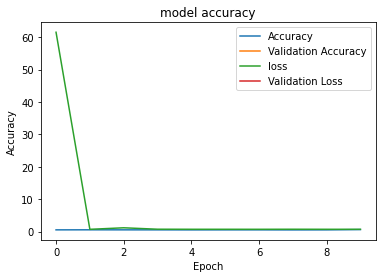

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()